In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Dataset/auto.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

drop yang tidak dipakai

In [ ]:
dataset = dataset.drop(['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location',
              'curb-weight','engine-type','num-of-cylinders',' engine-size','fuel-system','horsepower','city-mpg','highway-mpg'], axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         205 non-null    float64
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   bore               205 non-null    object 
 5   stroke             205 non-null    object 
 6   compression-ratio  205 non-null    float64
 7   peak-rpm           205 non-null    object 
 8   price              205 non-null    object 
dtypes: float64(5), object(4)
memory usage: 14.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7936567c50>,
      dtype=object)

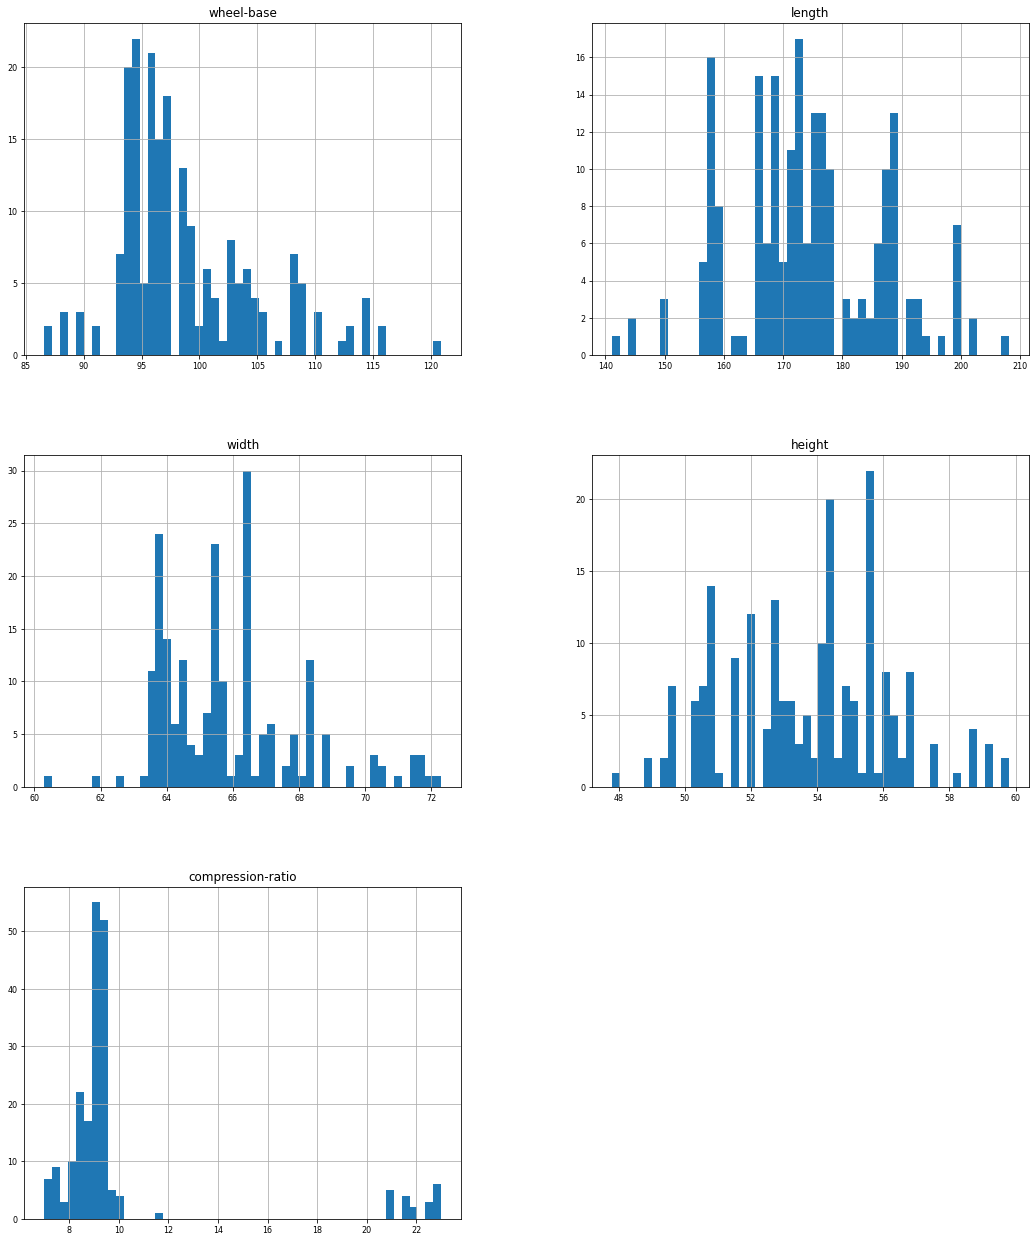

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
#dataCleaning
#replace nilai ? dengan none
dataset.replace("?", np.nan, inplace=True)

dataset.head()

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,13495
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,5000,16500
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,5000,16500
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,5500,13950
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,5500,17450


In [ ]:
dataset.isnull().sum().sort_values()

wheel-base           0
length               0
width                0
height               0
compression-ratio    0
peak-rpm             2
bore                 4
stroke               4
price                4
dtype: int64

ganti nilai nan dengan nilai rata-rata

In [ ]:
avg_bore=dataset['bore'].astype('float').mean(axis=0)
avg_stroke=dataset['stroke'].astype('float').mean(axis=0)
avg_pr=dataset['peak-rpm'].astype('float').mean(axis=0)

In [ ]:
dataset['bore'].replace(np.nan, avg_bore, inplace=True)
dataset['stroke'].replace(np.nan, avg_stroke, inplace=True)
dataset['peak-rpm'].replace(np.nan, avg_pr, inplace=True)

In [ ]:
dataset.isnull().sum().sort_values()

wheel-base           0
length               0
width                0
height               0
bore                 0
stroke               0
compression-ratio    0
peak-rpm             0
price                4
dtype: int64

hapus nilai nan pada price 

In [ ]:
dataset.dropna(subset=["price"], axis=0, inplace=True)
dataset.isnull().sum()

wheel-base           0
length               0
width                0
height               0
bore                 0
stroke               0
compression-ratio    0
peak-rpm             0
price                0
dtype: int64

ubah data object menjadi float

In [ ]:
dataset[["bore", "stroke", "price", "peak-rpm"]] = dataset[["bore", "stroke", "price", "peak-rpm"]].astype("float")

In [ ]:
dataset.dtypes

wheel-base           float64
length               float64
width                float64
height               float64
bore                 float64
stroke               float64
compression-ratio    float64
peak-rpm             float64
price                float64
dtype: object

In [ ]:
corr = dataset.corr()

corr

,wheel-base,length,width,height,bore,stroke,compression-ratio,peak-rpm,price
wheel-base,1.000000,0.876024,0.814507,0.590742,0.493244,0.158018,0.250313,-0.360305,0.584642
length,0.876024,1.000000,0.857170,0.492063,0.608971,0.123952,0.159733,-0.285970,0.690628
width,0.814507,0.857170,1.000000,0.306002,0.544885,0.188822,0.189867,-0.245800,0.751265
height,0.590742,0.492063,0.306002,1.000000,0.180449,-0.060663,0.259737,-0.309974,0.135486
bore,0.493244,0.608971,0.544885,0.180449,1.000000,-0.055390,0.001263,-0.267392,0.543155
stroke,0.158018,0.123952,0.188822,-0.060663,-0.055390,1.000000,0.187871,-0.063561,0.082269
compression-ratio,0.250313,0.159733,0.189867,0.259737,0.001263,0.187871,1.000000,-0.435780,0.071107
peak-rpm,-0.360305,-0.285970,-0.245800,-0.309974,-0.267392,-0.063561,-0.435780,1.000000,-0.101616
price,0.584642,0.690628,0.751265,0.135486,0.543155,0.082269,0.071107,-0.101616,1.000000


In [ ]:
dataset.corr()['price'][:-1]

wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
bore                 0.543155
stroke               0.082269
compression-ratio    0.071107
peak-rpm            -0.101616
Name: price, dtype: float64

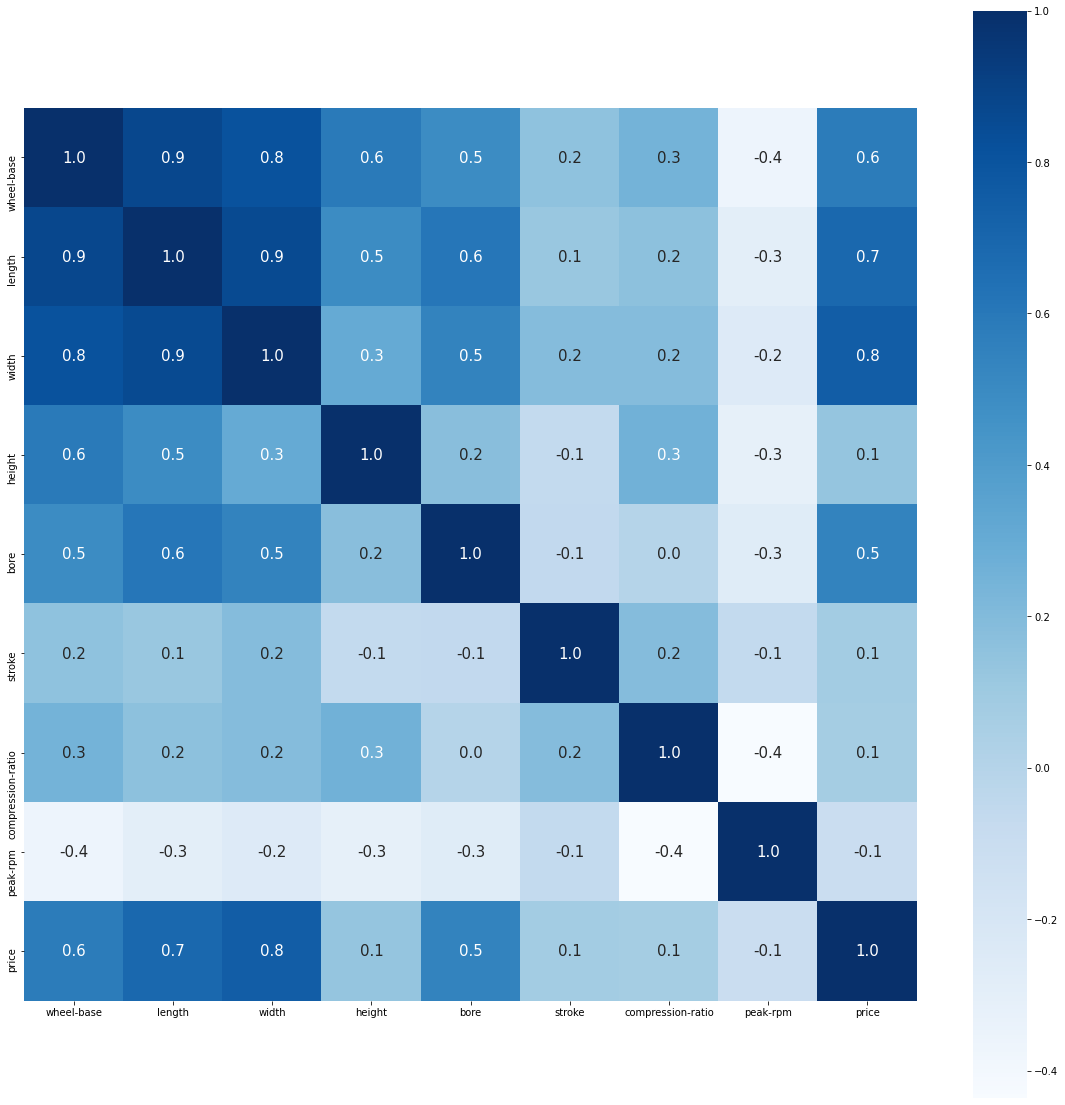

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

## Linear Regression

### Feature Engineering

In [ ]:
label = dataset['price']
features = dataset.drop(['price'], axis=1)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.244769250439587
MAE (Mean Absolute Error) 0.37372756360580484
r^2 score 0.6582019578480833
RMSE (Root Mean Squared Error 0.49474159966550924


### Deep Learning

In [ ]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 7ms/step - loss: 1.0345 - val_loss: 0.6813
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.9801 - val_loss: 0.6502
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.9087 - val_loss: 0.6122
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.8216 - val_loss: 0.5663
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.7219 - val_loss: 0.5234
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6402 - val_loss: 0.4851
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5588 - val_loss: 0.4605
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5069 - val_loss: 0.4435
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4796 - val_loss: 0.4364
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4582 - val_loss: 0.4321
Epoch 11/50
20/20 [

In [ ]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.20314819222605682
MAE (Mean Absolute Error) 0.33223712556229745
r^2 score 0.7163219879749345
RMSE (Root Mean Squared Error 0.4507196381633008


## Deeper Model

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
20/20 [==============================] - 0s 7ms/step - loss: 1.0706 - val_loss: 0.7185
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 1.0641 - val_loss: 0.7120
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 1.0473 - val_loss: 0.6963
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 1.0115 - val_loss: 0.6636
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.9526 - val_loss: 0.6126
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.8588 - val_loss: 0.5563
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.7587 - val_loss: 0.5067
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6634 - val_loss: 0.4754
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5861 - val_loss: 0.4542
Epoch 10/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5233 - val_loss: 0.4447
Epoch 11/50
20/20 [

In [ ]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.17896814128372948
MAE (Mean Absolute Error) 0.3123560700062108
r^2 score 0.7500872344524978
RMSE (Root Mean Squared Error 0.42304626376287674


### Wider model

In [ ]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=8, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 1.0530 - val_loss: 0.7031
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9967 - val_loss: 0.6721
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9230 - val_loss: 0.6318
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8339 - val_loss: 0.5860
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7181 - val_loss: 0.5434
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6240 - val_loss: 0.5025
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5480 - val_loss: 0.4774
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4997 - val_loss: 0.4588
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4662 - val_loss: 0.4481
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4451 - val_loss: 0.4283
Epoch 11/

In [ ]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.1876631506671959
MAE (Mean Absolute Error) 0.29800643927910436
r^2 score 0.7379454430370158
RMSE (Root Mean Squared Error 0.4332010510919796


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [ ]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,val_loss,epoch
0,1.053002,0.703073,0
1,0.996729,0.672098,1
2,0.922953,0.631786,2
3,0.833886,0.585997,3
4,0.718055,0.543356,4
...,...,...,...
95,0.168311,0.187555,95
96,0.168255,0.188714,96
97,0.165760,0.188839,97
98,0.165444,0.188186,98


In [ ]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
95,0.168311,0.187555,95
99,0.163507,0.187663,99
87,0.176013,0.187665,87
93,0.169287,0.187707,93
91,0.170469,0.188133,91
...,...,...,...
4,0.718055,0.543356,4
3,0.833886,0.585997,3
2,0.922953,0.631786,2
1,0.996729,0.672098,1


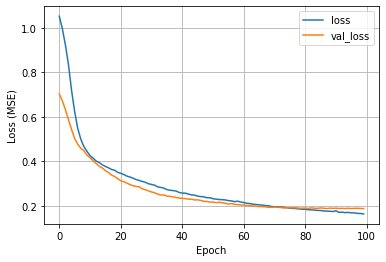

In [ ]:
plot_loss(history) # epoch vs loss graph #untuk wider

LINEAR REGRESSION

r^2 score : 0.6582019578480833


RMSE : 0.49474159966550924

DEEP LEARNING

r^2 score : 0.7163219879749345


RMSE : 0.4507196381633008

DEEPER MODEL

r^2 score : 0.7500872344524978


RMSE : 0.42304626376287674

WIDER MODEL

r^2 score : 0.7379454430370158


RMSE : 0.4332010510919796

Kesimpulan : nilai akurasi yang paling tinggi didapatkan pada Deeper model yaitu sebesar 75% dan nilai rmse nya juga kecil 0.42